**<font  size=6>廣度優先搜索算法(BFS)</font>**

- 廣度優先搜索算法（又稱寬度優先搜索）是最簡便的圖的搜索算法之一，這一算法也是很多重要的圖的算法的原型。Dijkstra單源最  
短路徑算法和Prim最小生成樹算法都採用了和寬度優先搜索類似的思想。其別名又叫BFS（breadth-first search），屬於一種盲目  
搜尋法，目的是系統地展開並檢查圖中的所有節點，以找尋結果。換句話說，它並不考慮結果的可能位置，徹底地搜索整張圖，直到找  
到結果為止。
- 廣度優先搜索讓你能夠找出兩樣東西之間的最短距離，不過最短距離的含義有很多！
- 下面先介紹一下什麼是圖，再介紹第一種圖算法——廣度優先搜索算法。

In [1]:
%matplotlib inline
from IPython.display import Image

**<font  size=5>1. 圖簡介</font>**  
假設你居住在舊金山，要從雙子峰前往金門大橋。你想乘公交車前往，並希望換乘最少。可乘坐的公交車如下：

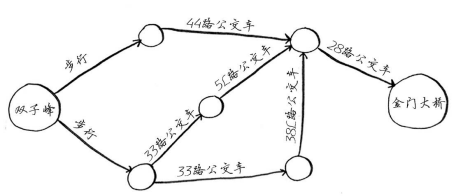

In [4]:
Image('./圖/127/127.1.png')

為找出換乘最少的乘車路線，你將使用什麼樣的算法？  
一步就能到達金門大橋嗎？下面標記了所有一步就能到達的地方：

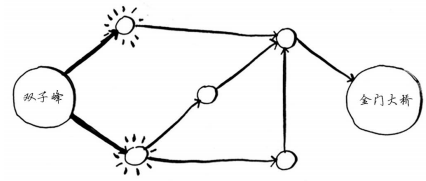

In [3]:
Image('./圖/127/127.2.png')

金門大橋未標記，因此一步無法到達那裡。兩步能嗎？


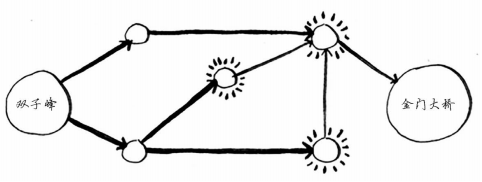

In [5]:
Image('./圖/127/127.3.png')

金門大橋也未標記，因此兩步也到不了。三步呢？

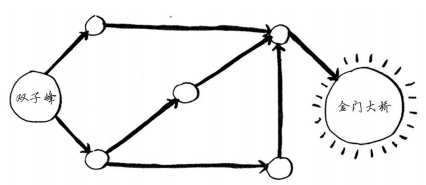

In [6]:
Image('./圖/127/127.4.png')

金門大橋被標記了！因此從雙子峰出發，可沿下面的路線三步到達金門大橋：

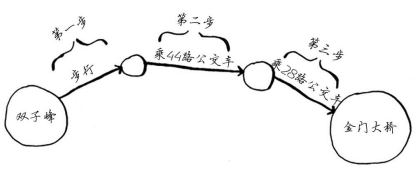

In [7]:
Image('./圖/127/127.5.png')

還有其他前往金門大橋的路線，但它們更遠（需要四步）。  
　　這個算法發現，前往金門大橋的最短路徑需要三步。這種問題被稱為最短路徑問題（shorterst-path problem）。你經常要找出最短路  
徑，這可能是前往朋友家的最短路徑，也可能是國際象棋中把對方將死的最少步數。  
　　解決最短路徑問題的算法被稱為廣度優先搜索。要確定如何從雙子峰前往金門大橋，需要兩個步驟:  
　　(1) 使用圖來建立問題模型；  
　　(2) 使用廣度優先搜索解決問題。  
　　**什麼是圖？圖由節點（node）和邊（edge）組成。一個節點可能與眾多節點直接相連，這些直接相連的節點被稱為鄰居。圖用於模  
擬不同的東西是如何相連的。**

**<font  size=5>2. 廣度優先搜索算法</font>**  

廣度優先搜索是一種用於圖的查找算法，可幫助回答兩類問題：  
　　第一類問題：從節點A出發，有前往節點B的路徑嗎？  
　　第二類問題：從節點A出發，前往節點B的哪條路徑最短？  
前面計算從雙子峰前往金門大橋的最短路徑時，已使用過廣度優先搜索。這個問題屬於第二類問題：哪條路徑最短？下面來詳細地研  
究這個算法，你將使用它來回答第一類問題：有路徑嗎？  
　　假設你經營著一個芒果農場，需要尋找芒果銷售商，以便將芒果賣給他。為此，你可在朋友中查找。

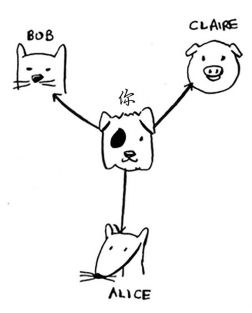

In [8]:
Image('./圖/127/127.6.png')

這種查找很簡單。首先，創建一個朋友名單。


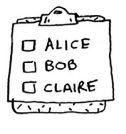

In [9]:
Image('./圖/127/127.7.png')

然後，依次檢查名單中的每個人，看看他是否是芒果銷售商。


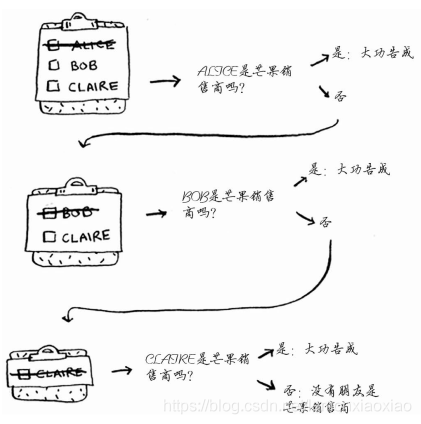

In [10]:
Image('./圖/127/127.8.png')

假設你沒有朋友是芒果銷售商，那麼你就必須在朋友的朋友中查找。

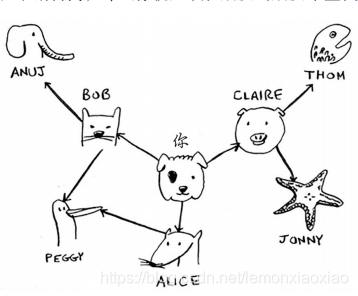

In [12]:
Image('./圖/127/127.9.png')

檢查名單中的每個人時，你都將其朋友加入名單。

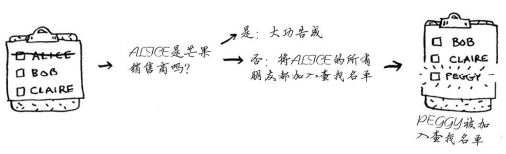

In [14]:
Image('./圖/127/127.10.png')

**<font  size=5>2.1 查找最短路徑</font>**  

再說一次，廣度優先搜索可回答兩類問題：  
　　第一類問題：從節點A出發，有前往節點B的路徑嗎？（在你的人際關係網中，有芒果銷售商嗎？）  
　　第二類問題：從節點A出發，前往節點B的哪條路徑最短？（哪個芒果銷售商與你的關係最近？）  
　　剛才你看到瞭如何回答第一類問題，下面來嘗試回答第二類問題——誰是關係最近的芒果銷售商。例如，朋友是一度關係，朋友的朋  
友是二度關係。

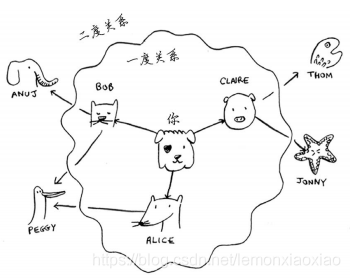

In [15]:
Image('./圖/127/127.11.png')

在你看來，一度關係勝過二度關係，二度關係勝過三度關係，以此類推。因此，你應先在一度關係中搜索，確定其中沒有芒果銷售商  
後，才在二度關係中搜索。廣度優先搜索就是這樣做的！  

在廣度優先搜索的執行過程中，搜索範圍從起點開始逐漸向外延伸，即先檢查一度關係，再檢查二度關係。順便問一句：將先檢查  
Claire還是Anuj呢？Claire是一度關係，而Anuj是二度關係，因此將先檢查Claire，後檢查Anuj。

你也可以這樣看，一度關係在二度關係之前加入查找名單。你按順序依次檢查名單中的每個人，看看他是否是芒果銷售商。這將先在  
一度關係中查找，再在二度關係中查找，因此找到的是關係最近的芒果銷售商。  

廣度優先搜索不僅查找從A到B的路徑，而且找到的是最短的路徑。

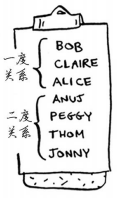

In [16]:
Image('./圖/127/127.12.png')

**注意：只有按添加順序查找時，才能實現這樣的目的。換句話說，如果Claire先於Anuj加入名單，就需要先檢查Claire，再檢查  
Anuj。如果Claire和Anuj都是芒果銷售商，而你先檢查Anuj再檢查Claire，結果將如何呢？找到的芒果銷售商並非是與你關係最近的  
，因為Anuj是你朋友的朋友，而Claire是你的朋友。因此，你需要按添加順序進行檢查。有一個可實現這種目的的數據結構，那就是隊列  
（queue）。**

**<font  size=5>2.2 隊列</font>**  

隊列的工作原理與現實生活中的隊列完全相同。假設你與朋友一起在公交車站排隊，如果你排在他前面，你將先上車。隊列的工作原理與  
此相同。隊列類似於棧，你不能隨機地訪問隊列中的元素。隊列只支持兩種操作：入隊和出隊。　

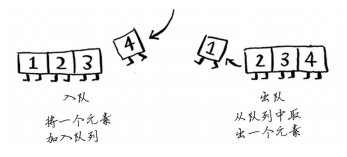

In [17]:
Image('./圖/127/127.13.png')

如果你將兩個元素加入隊列，先加入的元素將在後加入的元素之前出隊。因此，你可使用隊列來表示查找名單！這樣，先加入的人將先出隊並先被檢查。  
隊列是一種先進先出（First In First Out，FIFO）的數據結構，而棧是一種後進先出（Last In First Out，LIFO）的數據結構。

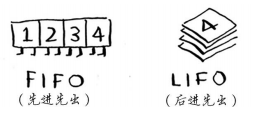

In [18]:
Image('./圖/127/127.14.png')

知道隊列的工作原理後，我們來實現廣度優先搜索！

**<font  size=5>3. 實現圖 </font>**  

首先，需要使用代碼來實現圖。圖由多個節點組成，每個節點都與鄰近節點相連。如何表示類似於“你→Bob”這樣的關係呢？好在你知道  
的一種結構讓你能夠表示這種關係，它就是散列表！

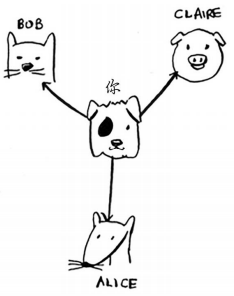

In [20]:
Image('./圖/127/127.15.png')

記住，散列表讓你能夠將鍵映射到值。在這裡，你要將節點映射到其所有鄰居。

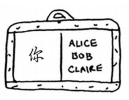

In [21]:
Image('./圖/127/127.16.png')

表示這種映射關係的Python代碼如下：  
　　graph = {}  
　　graph[“you”] = [“alice”, “bob”, “claire”]  
　　注意，“你”被映射到了一個數組，因此graph[“you”]是一個數組，其中包含了“你”的所有鄰居。  
　　圖不過是一系列的節點和邊，因此在Python中，只需使用上述代碼就可表示一個圖。那像下面這樣更大的圖呢？

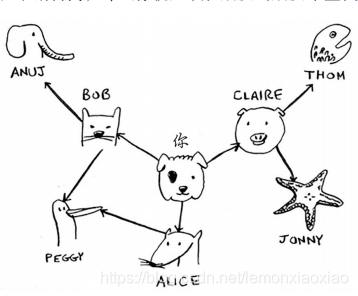

In [23]:
Image('./圖/127/127.17.png')

表示它的Python代碼如下：

In [24]:
graph = {}
graph['you'] = ['alice', 'bob', 'claire']
graph['bob'] = ['anuj', 'peggy']
graph['alice'] = ['peggy']
graph['claire'] = ['thom', 'jonny']
graph['anuj'] = []
graph['peggy'] = []
graph['thom'] = []
graph['jonny'] = []

順便問一句：鍵—值對的添加順序重要嗎？換言之，如果你這樣編寫代碼：

In [27]:
graph['claire'] = ['thom', 'jonny']
graph['anuj'] = []

而不是這樣編寫代碼:

In [28]:
graph['anuj'] = []
graph['claire'] = ['thom', 'jonny']

對結果有影響嗎？只要回顧一下以前介紹的內容，你就知道沒影響。散列表是無序的，因此添加鍵—值對的順序無關緊要。  
　　Anuj、Peggy、Thom和Jonny都沒有鄰居，這是因為雖然有指向他們的箭頭，但沒有從他們出髮指向其他人的箭頭。這被稱為有向圖  
（directed graph），其中的關係是單向的。因此，Anuj是Bob的鄰居，但Bob不是Anuj的鄰居。無向圖（undirected graph）沒有箭頭  ，  
直接相連的節點互為鄰居。例如，下面兩個圖是等價的：

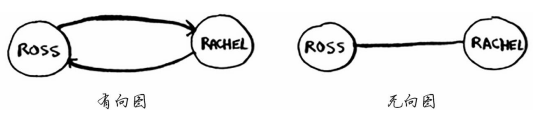

In [29]:
Image('./圖/127/127.18.png')

**<font  size=5>4. 實現廣度優先搜索算法</font>**

先概述一下這種算法的工作原理：

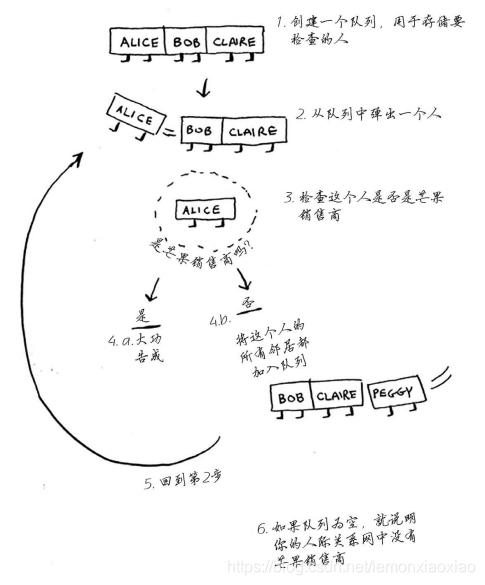

In [30]:
Image('./圖/127/127.19.png')

首先，創建一個隊列。在Python中，可使用函數deque來創建一個雙端隊列：

In [32]:
from collections import deque
search_queue = deque()#創建一個隊列
search_queue += graph['you']#將你的鄰居都加入到這個搜索隊中

別忘了，graph[“you”]是一個數組，其中包含你的所有鄰居，如[“alice”, “bob”, “claire”]。這些鄰居都將加入到搜索隊列中。  
下面來看看其他的代碼

In [ ]:
while search_queue:#只要隊列不為空
    person = search_queue.popleft()#就取出其中的第一個人
    if person_is_seller(person):#檢查這個人是否是芒果銷售商
        print(person + " is a mango seller!")#是芒果銷售商
        return True
    else:#不是芒果銷售商
        search_queue += graph[person]
return False

下面來看看廣度優先搜索的執行過程：

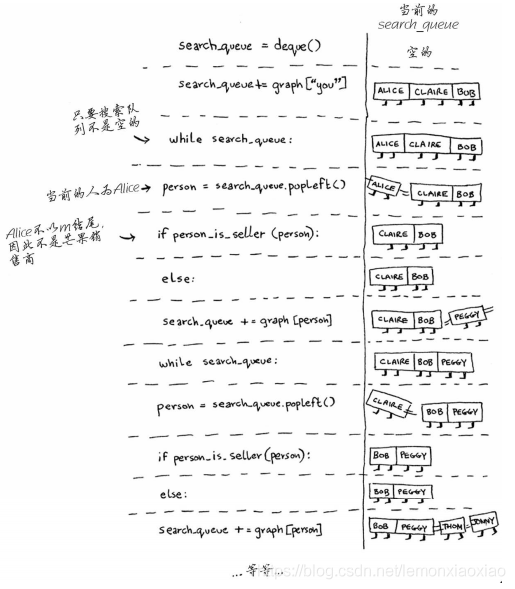

In [33]:
Image('./圖/127/127.20.png')

這個算法將不斷執行，直到滿足以下條件之一：  
（1）找到一位芒果銷售商；  
（2） 隊列變成空的，這意味著你的人際關係網中沒有芒果銷售商。  
　　Peggy既是Alice的朋友又是Bob的朋友，因此她將被加入隊列兩次：一次是在添加Alice的朋友時，另一次是在添加Bob的朋友時。因  
此，搜索隊列將包含兩個Peggy。但你只需檢查Peggy一次，看她是不是芒果銷售商。如果你檢查兩次，就做了無用功。因此，檢查完一  
個人後，應將其標記為已檢查，且不再檢查他。如果不這樣做，就可能會導致無限循環。假設你的人際關係網類似於下面這樣：

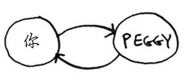

In [34]:
Image('./圖/127/127.21.png')

一開始，搜索隊列包含你的所有鄰居：

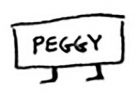

In [35]:
Image('./圖/127/127.22.png')

現在你檢查Peggy。她不是芒果銷售商，因此你將其所有鄰居都加入搜索隊列：

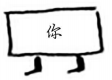

In [36]:
Image('./圖/127/127.23.png')

接下來，你檢查自己。你不是芒果銷售商，因此你將你的所有鄰居都加入搜索隊列：

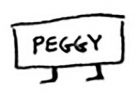

In [37]:
Image('./圖/127/127.24.png')

以此類推。這將形成無限循環，因為搜索隊列將在包含你和包含Peggy之間反复切換：

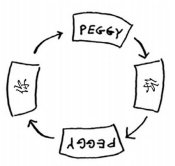

In [38]:
Image('./圖/127/127.25.png')

檢查一個人之前，要確認之前沒檢查過他，這很重要。為此，你可使用一個列表來記錄檢查過的人。

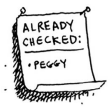

In [39]:
Image('./圖/127/127.26.png')

考慮到這一點後，廣度優先搜索的最終代碼如下：

In [ ]:
def search(name):
    search_queue = deque()
    search_queue += graph[name]
    searched = []
    while search_queue:
        person = search_queue.popleft()
        if not person in searched:
            if person_is_seller(person):
                print(person+" is a mango seller!")
                return True
            else:
                search_queue += graph[person]
                searched.append(person)
    return False
search('you')

**運行時間：**  
如果你在你的整個人際關係網中搜索芒果銷售商，就意味著你將沿每條邊前行（記住，邊是從一個人到另一個人的箭頭或連接），因此運  
行時間至少為O(邊數)。你還使用了一個隊列，其中包含要檢查的每個人。將一個人添加到隊列需要的時間是固定的，即為O(1)，因此對  
每個人都這樣做需要的總時間為O(人數)。所以，廣度優先搜索的運行時間為O(人數+ 邊數)，這通常寫作O(V + E)，其中V為頂點  
（vertice）數，E為邊數。

**<font  size=5>5. 小結：</font>**

1. 廣度優先搜索指出是否有從A到B的路徑。如果有，廣度優先搜索將找出最短路徑。
2. 面臨類似於尋找最短路徑的問題時，可嘗試使用圖來建立模型，再使用廣度優先搜索來解決問題。
3. 有向圖中的邊為箭頭，箭頭的方向指定了關係的方向，例如， rama→adit 表示rama 欠adit 錢。
4. 無向圖中的邊不帶箭頭，其中的關係是雙向的，例如， ross - rachel 表示ross 與rachel 約會，而rachel 也與ross 約會。
5. 隊列是先進先出（FIFO）的。
6. 棧是後進先出（LIFO）的。
7. 你需要按加入順序檢查搜索列表中的人，否則找到的就不是最短路徑，因此搜索列表必須是隊列。
8. 對於檢查過的人，務必不要再去檢查，否則可能導致無限循環。